## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# NORTHWESTERN COUNTY REAL ESTATE PROJECT

# Business Understanding.

# 1.1 Overview

As a major sector of the economy, the real estate market is highly dependent on several factors to achieve success, mainly precise house price forecasts. A real estate agency in King County, Washington state is looking for help in determining the primary factors that affect property values within the region. This project uses data from the King County House Sales dataset, which contains past real estate sales data that includes information on a variety of properties such as the previous sale price, the grade of the home and the year of construction. Some of the challenges that affect the real estate market are economic downturns like decrease in demand of property or increase in housing prices causing challenges of affordability and insufficient data that makes it difficult to make a recommendation system. A solution would be to create a combination of several multiple linear regression models in order to identify trends in the data. The project's objective is to create a thorough advice system for the agency that will help homeowners understand how house renovations may affect the estimated worth of their properties. 

# 1.2 Stakeholders

The stakeholders in this analysis are: the real estate agency, real estate developers, potential investors, potential customers and home owners

# 1.3 Business Problem

A real estate agency from King County tasked us to analyze how different features affect prices of homes since as stakeholders, they don't have a reliable system that offers data driven insights and predictions to these home prices. Based on the particular characteristics of the homeowner's property, we will use data analytics and predictive modeling through simple and multiple linear regression approaches to; help homeowners accurately assess the value of their own houses, investors find potentially discounted properties, and real estate agents will be able to counsel their customers on pricing approaches by predicting home prices with ease.

# 1.4 Objectives

The key objectives for this analysis are as follows;
1.	Predicting home prices: To create a predictive model that estimates increase in market value of home based on renovation factors.

2.	Identifying the most important features: To review which renovation variables have the highest impact on increasing estimated value of a home.
- How much is the likely increase in the sale price by adding an additional floor?
- How much is the likely increase in the sale price by adding an extension to the living space in the home?
- How much is the likely increase in the sale price by adding an additional bedroom?

3.	Monitoring real estate market trends: To learn more about the regions with the highest and lowest average sale price as well as the most in-demand property types.



# DATA UNDERSTANDING

The research retrieves information from King County House Sales dataset which contains the kc_house_data.csv file used to forecast the sales price of homes in King County.

`Description`: It comprises of 21,597 housing observations and 20 house features along with a column indicating the home id. The data covers homes sold between May 2014 and May 2015

The columns in the dataset are:

Numerical Columns (15)

- date - Date house was sold

- price - Sale price (prediction target)

- bedrooms - Number of bedrooms

- bathrooms - Number of bathrooms

- sqft_living - Square footage of living space in the home

- sqft_lot - Square footage of the lot

- floors - Number of floors (levels) in house

- sqft_above - Square footage of house apart from basement

- sqft_basement - Square footage of the basement

- yr_built - Year when house was built

- yr_renovated - Year when house was renovated

- lat - Latitude coordinate

- long - Longitude coordinate

- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Categorical Columns (6)
- id - Unique ID for each home sold

- waterfront - Whether the house has a view to a waterfront

- view - how good the view of the property was

- condition - the condition of the house

- grade - overall grade of the house. Related to the construction and design of the house 

- zipcode - What zip code area the house is in


`Key variables:`
price, bedrooms, sqft living, floors


`Target Variable`: The `"price"` of the properties is the project's target variable. This indicates that other independent variables, such as the attributes of the property (square footage, number of bedrooms, location, etc.), are what predict or explain the outcome or goal variable. The price of a property will be the variable being modeled or projected in statistical modeling and analysis based on the values of other variables.

These variables will be used to answer the data questions and derive actionable insights to the real estate agency on how to make predictions on price based on features affecting sales


In [2]:
# First we import packages to be used.
import markdown
import pandas as pd
import numpy as np
import csv
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold
import scipy.stats as stats

plt.style.use('seaborn')

C:\Users\HP\AppData\Local\Temp\ipykernel_2416\3534279396.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
def load_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Convert 'date' column to datetime format
    data["date"] = pd.to_datetime(data['date'])
    
    # Split 'grade' column into 'grade_' and 'grade_comment'
    data[["grade_", "grade_comment"]] = (
        data["grade"].str.split(" ", n=1, expand=True)
    )

    return data

In [4]:
df = load_data("data/kc_house_data.csv")

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_,grade_comment
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7,Average
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,Average
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6,Low Average
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7,Average
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8,Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [7]:
df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1986.620318,12758.283512
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,685.230472,27274.441950
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,399.000000,651.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,6210.000000,871200.000000


In [8]:
#checking for missing values

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_              0
grade_comment       0
dtype: int64

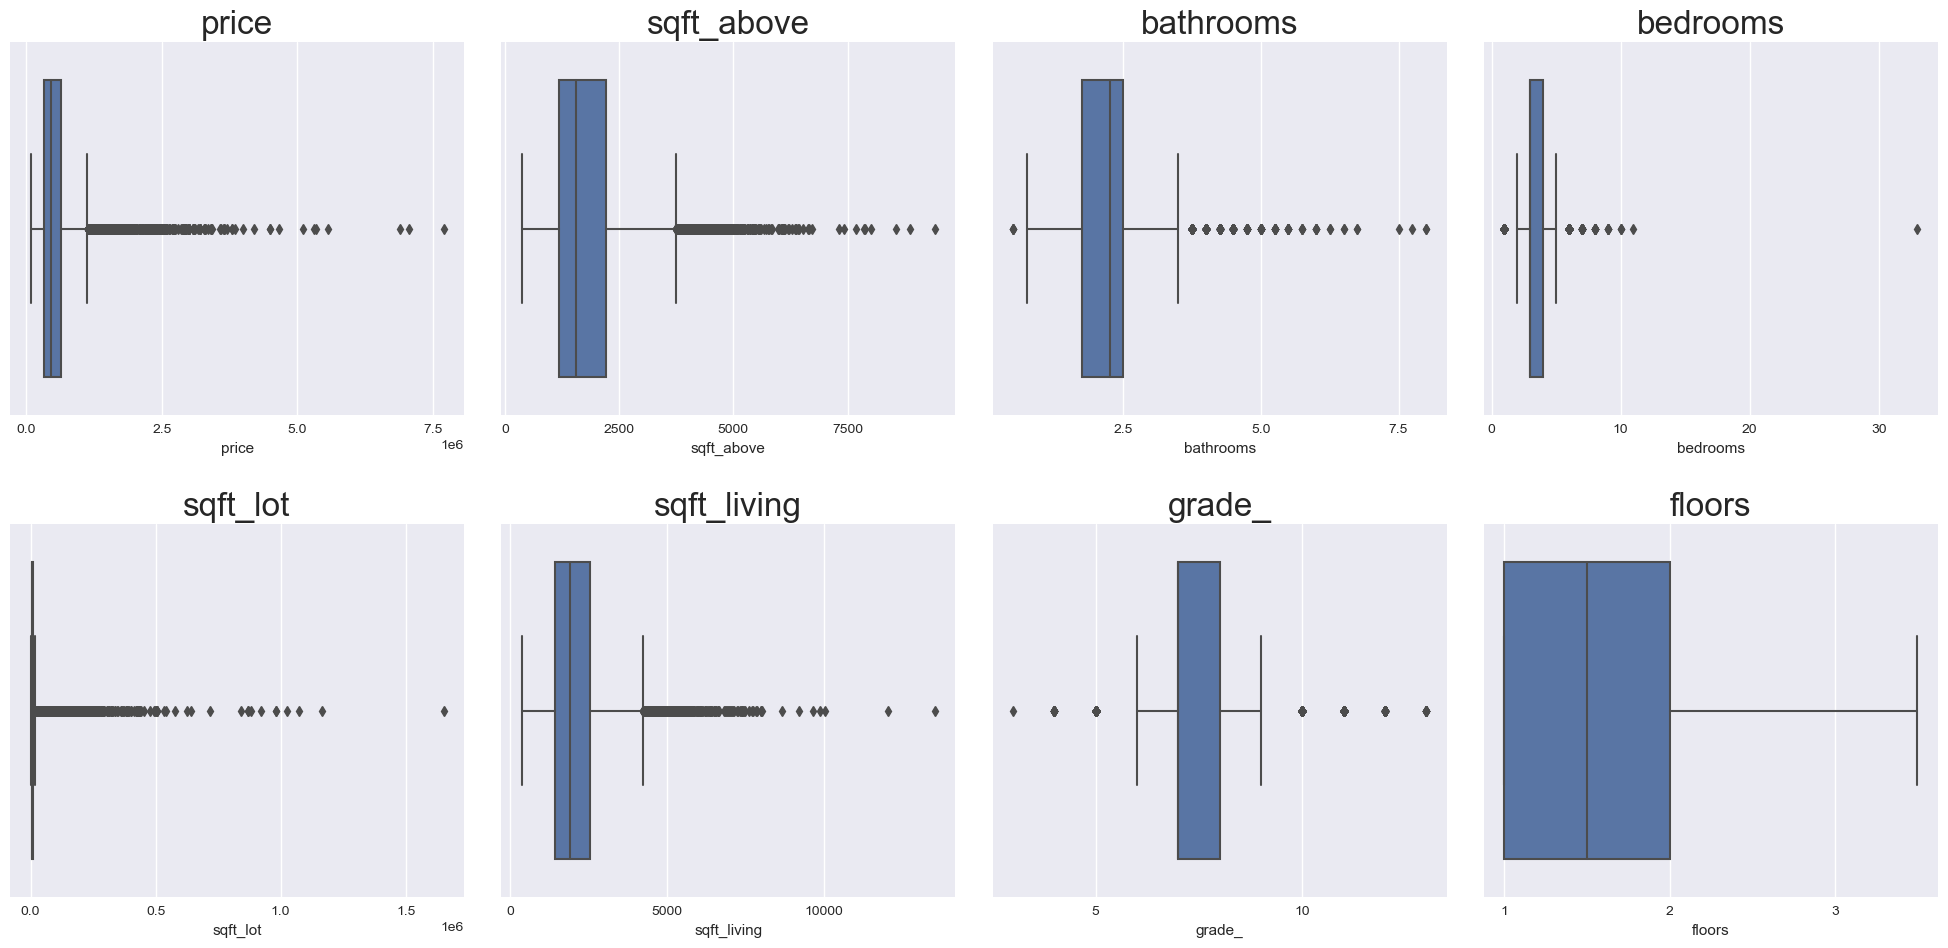

In [9]:
# function to visualize outliers 

def plot_boxplots(df, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)
    for i, col in enumerate(cols):

        # convert the x-axis variable to a numeric data type
        
        df[col] = df[col].astype(float)
        sns.boxplot(x=df[col], ax=axes[i])
        
        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = ['price', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_living', 'grade_', 'floors']

# call the plot_boxplots function

plot_boxplots(df, cols)

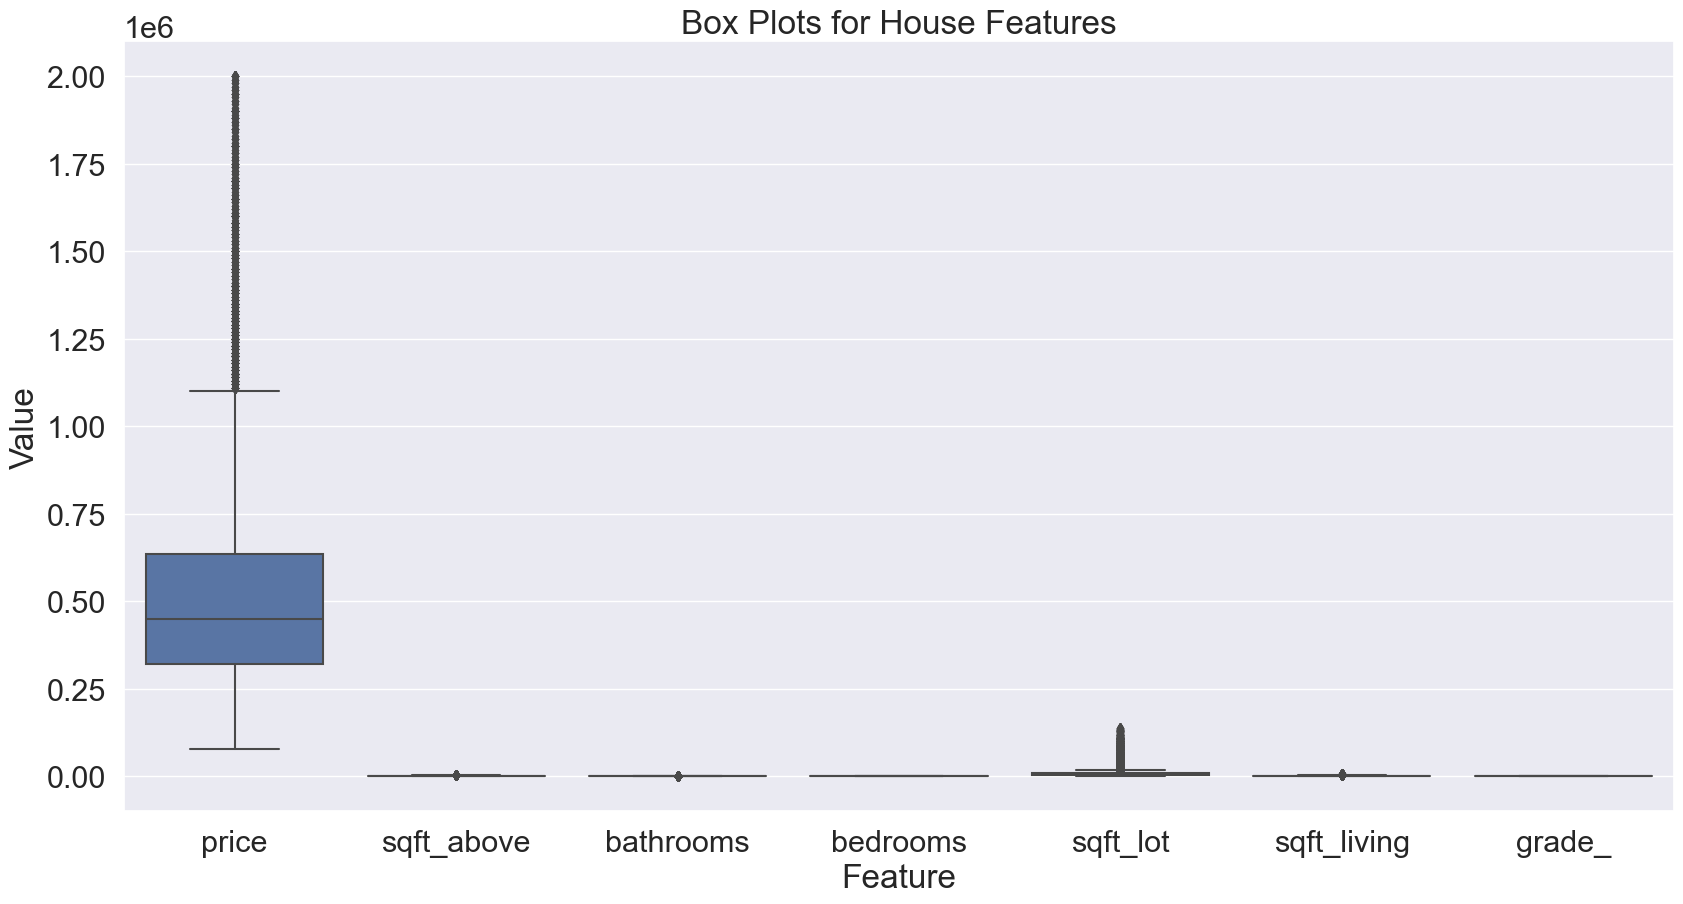

In [10]:
# function to remove outliers

def remove_outliers(column,x):
    new_column = column[(np.abs(stats.zscore(column))<x)]
    return new_column
# remove outliers for price
price = remove_outliers(df.price, 4)

# remove outliers for sqft_above
sqft_above_ground = remove_outliers(df.sqft_above, 3)

# remove outliers for bathrooms
bathrooms = remove_outliers(df.bathrooms, 4)

# remove outliers for bedrooms
bedrooms = remove_outliers(df.bedrooms, 2)

# remove outliers for sqft_lot

sqft_lot = remove_outliers(df.sqft_lot, 3)

# remove outliers for sqft_living
sqft_living = remove_outliers(df.sqft_living, 4)
grade = remove_outliers(df.grade_, 1.5)

# combine all columns into a single dataframe
columns = pd.concat([price, sqft_above_ground, bathrooms, bedrooms, sqft_lot, sqft_living, grade], axis=1)

# plot box plots for all columns
plt.figure(figsize=(20,10))
sns.boxplot(data=columns)
plt.title('Box Plots for House Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()